In [1]:
import requests
import json
import pandas as pd

In [2]:
#create a text file that contains your API key
#you DO NOT want others to see your API key
#this method is not the most secure but will work for this exercise

#this will read the file and store your API key as a variable
with open('brewDB_key.txt', 'r') as file:
    for line in file:
        api_key = line

In [3]:
#sandbox database to practice getting data from their API
url = r"https://sandbox-api.brewerydb.com/v2/breweries/?key="+api_key

In [4]:
#in the request to the website, give it the url and add the API key at the end
response = requests.get(url)

In [5]:
#status code is 200, so this is good
response

<Response [200]>

In [6]:
breweriesapidata = response.json()

In [7]:
#to see all the JSON data from the API
breweriesapidata

{'currentPage': 1,
 'numberOfPages': 1,
 'totalResults': 19,
 'data': [{'id': 'BznahA',
   'name': 'Anheuser-Busch InBev',
   'nameShortDisplay': 'Anheuser-Busch InBev',
   'description': "Anheuser-Busch operates 12 breweries in the United States, 14 in China and one in the United Kingdom. Anheuser-Busch's operations and resources are focused on adding to life's enjoyment not only through the responsible consumption of beer by adults, but through theme park entertainment and packaging.  In the United States, the company holds a 48.5 percent share of U.S. beer sales. Worldwide, Anheuser-Busch's beer sales volume was 128.4 million barrels in 2007.  The St. Louis-based company's subsidiaries include one of the largest U.S. manufacturers of aluminum beverage containers and one of the world's largest recyclers of aluminum beverage cans. Anheuser-Busch also has interests in malt production, rice milling, real estate development, turf farming, metalized and paper label printing, bottle produc

In [8]:
#to see all the JSON data from the API
breweriesdata = breweriesapidata['data']

In [9]:
breweriesdata

[{'id': 'BznahA',
  'name': 'Anheuser-Busch InBev',
  'nameShortDisplay': 'Anheuser-Busch InBev',
  'description': "Anheuser-Busch operates 12 breweries in the United States, 14 in China and one in the United Kingdom. Anheuser-Busch's operations and resources are focused on adding to life's enjoyment not only through the responsible consumption of beer by adults, but through theme park entertainment and packaging.  In the United States, the company holds a 48.5 percent share of U.S. beer sales. Worldwide, Anheuser-Busch's beer sales volume was 128.4 million barrels in 2007.  The St. Louis-based company's subsidiaries include one of the largest U.S. manufacturers of aluminum beverage containers and one of the world's largest recyclers of aluminum beverage cans. Anheuser-Busch also has interests in malt production, rice milling, real estate development, turf farming, metalized and paper label printing, bottle production and transportation services.",
  'website': 'http://www.anheuser-bus

In [10]:
type(breweriesdata)

list

In [11]:
breweriesdata[0]

{'id': 'BznahA',
 'name': 'Anheuser-Busch InBev',
 'nameShortDisplay': 'Anheuser-Busch InBev',
 'description': "Anheuser-Busch operates 12 breweries in the United States, 14 in China and one in the United Kingdom. Anheuser-Busch's operations and resources are focused on adding to life's enjoyment not only through the responsible consumption of beer by adults, but through theme park entertainment and packaging.  In the United States, the company holds a 48.5 percent share of U.S. beer sales. Worldwide, Anheuser-Busch's beer sales volume was 128.4 million barrels in 2007.  The St. Louis-based company's subsidiaries include one of the largest U.S. manufacturers of aluminum beverage containers and one of the world's largest recyclers of aluminum beverage cans. Anheuser-Busch also has interests in malt production, rice milling, real estate development, turf farming, metalized and paper label printing, bottle production and transportation services.",
 'website': 'http://www.anheuser-busch.co

In [12]:
type(breweriesdata[0])

dict

In [13]:
#Empty Elements
ID = []
Name = []
EstYear = []
Status = []
InBusiness = []
MassOwned = []
Organic = []
Website = []
Description = []

In [14]:
for brewreydata in breweriesdata:
    
    #ID
    try:
        if (len(brewreydata['id']) > 0):
            _Id = brewreydata['id']
        else:
            _Id = None
    except:
        _Id = None
    ID.append(_Id)
    
    #Name
    try:
        if (len(brewreydata['name']) > 0):
            _Name = brewreydata['name']
        else:
            _Name = None
    except:
        _Name = None
    Name.append(_Name)
    
    #Year of Establishment
    try:
        if (len(brewreydata['established']) > 0):
            _EstYear = brewreydata['established']
        else:
            _EstYear = None
    except:
        _EstYear = None
    EstYear.append(_EstYear)
    
    #Status
    try:
        if (len(brewreydata['status']) > 0):
            _Status = brewreydata['status']
        else:
            _Status = None
    except:
        _Status = None
    Status.append(_Status)
    
    #Is it in business?
    try:
        if (len(brewreydata['isInBusiness']) > 0):
            _InBusiness = brewreydata['isInBusiness']
        else:
            _InBusiness = None
    except:
        _InBusiness = None
    InBusiness.append(_InBusiness)
    
    #Is it mass owned?
    try:
        if (len(brewreydata['isMassOwned']) > 0):
            _MassOwned = brewreydata['isMassOwned']
        else:
            _MassOwned = None
    except:
        _MassOwned = None
    MassOwned.append(_MassOwned)
    
    #Is it organic?
    try:
        if (len(brewreydata['isOrganic']) > 0):
            _Organic = brewreydata['isOrganic']
        else:
            _Organic = None
    except:
        _Organic = None
    Organic.append(_Organic)
    
    #Website
    try:
        if (len(brewreydata['website']) > 0):
            _Website = brewreydata['website']
        else:
            _Website = None
    except:
        _Website = None
    Website.append(_Website)
    
    #Description
    try:
        if (len(brewreydata['description']) > 0):
            _Description = brewreydata['description']
        else:
            _Description = None
    except:
        _Description = None
    Description.append(_Description)    

In [15]:
#match indices of each list and zip into one list
breweryList = list(zip(ID, Name, EstYear, Status, InBusiness, MassOwned, Organic, Website, Description))

#names for columns in data frame
colnames = ['ID','Name','Year of Establishment',
            'Status','Is it in business?',
            'Is it mass owned?','Is it organic?',
            'Website','Description']

In [16]:
#create data frame with column names in it
df = pd.DataFrame(breweryList, columns=colnames)
df

,ID,Name,Year of Establishment,Status,Is it in business?,Is it mass owned?,Is it organic?,Website,Description
0,BznahA,Anheuser-Busch InBev,1852,verified,Y,Y,N,http://www.anheuser-busch.com/,Anheuser-Busch operates 12 breweries in the Un...
1,rd8LRZ,Boston Beer Company (Samuel Adams),None,new_unverified,Y,N,N,None,None
2,IImUD9,Breckenridge Brewery,1990,verified,Y,Y,N,http://www.breckbrew.com/,Breckenridge Brewery was founded in 1990 in Br...
3,uM2jeT,Brouwerij De Leite,2008,verified,Y,N,N,http://www.deleite.be/,Brewing since 1997. Officially transformed in...
4,p3YrOa,Dock Street Brewery,1985,verified,Y,N,N,http://www.dockstreetbeer.com,"Founded in 1985, Dock Street Brewing Co. was t..."
5,HaPdSL,Guinness,1759,verified,Y,Y,N,http://www.guinness.com/,St. James's Gate Brewery (Irish: Grúdlann Ghea...
6,DMU2Kf,Harmon Brewing Company,None,verified,Y,N,N,http://harmonbrewingco.com/,This 15 barrel microbrewery and restaurant is ...
7,p1tFbP,Jackalope Brewing Company,2011,verified,Y,N,N,http://www.jackalopebrew.com/,Jackalope Brewing Company is owned by Bailey S...
8,nLsoQ9,Lagunitas Brewing Company,1993,verified,Y,Y,N,http://www.lagunitas.com/,From our earliest days of striving to make con...
9,941OaA,Last Name Brewing,2003,verified,Y,N,N,http://www.lastnamebrewing.com/,Last Name Brewing is a craft brewery and tap r...


In [17]:
dfPlot = df[['ID', 'Year of Establishment','Name']]

In [18]:
dfPlot

,ID,Year of Establishment,Name
0,BznahA,1852,Anheuser-Busch InBev
1,rd8LRZ,None,Boston Beer Company (Samuel Adams)
2,IImUD9,1990,Breckenridge Brewery
3,uM2jeT,2008,Brouwerij De Leite
4,p3YrOa,1985,Dock Street Brewery
5,HaPdSL,1759,Guinness
6,DMU2Kf,None,Harmon Brewing Company
7,p1tFbP,2011,Jackalope Brewing Company
8,nLsoQ9,1993,Lagunitas Brewing Company
9,941OaA,2003,Last Name Brewing


In [19]:
dfPlot1 = dfPlot.set_index(["ID", "Year of Establishment"]).count(level="Year of Establishment")

In [20]:
dfPlot1

,Name
Year of Establishment,
1759,1
1852,1
1885,1
1980,1
1985,1
1990,1
1991,1
1993,1
1994,1


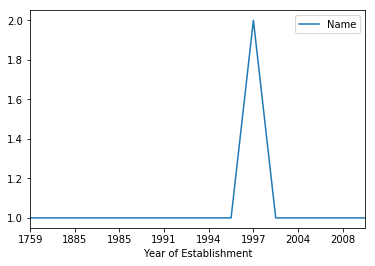

In [22]:
lines = dfPlot1.plot.line()